### Trim a Binary Search Tree

Given a binary search tree and the lowest and highest boundaries as L and R, trim the tree so that all its elements lies in [L, R] (R >= L). You might need to change the root of the tree, so the result should return the new root of the trimmed binary search tree.

See [The LeetCode example problem](https://leetcode.com/problems/trim-a-binary-search-tree/description/)

In [ ]:
debugging = False
debugging = True

def dprint(f, *args):
    if debugging:
        print(('  DBG:' + f).format(*args))

In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):

class TreeNode():
    """ A tree node """
    def __init__(self, value):
        self.value = value
        self.left  = None
        self.right = None
        
    def link(self, left, right):
        self.left  = left
        self.right = right
        
    def minv(self):
        if self.left:  return self.left.minv()
        if self.value: return self.value
        return self.right.minv()
        
    def maxv(self):
        if self.right: return self.right.maxv()
        if self.value: return self.value
        return self.left.maxv()
    
    def depth(self, current=0):
        ldepth = current if self.left  is None else self.left.depth(current+1)
        rdepth = current if self.right is None else self.right.depth(current+1)
        d = max(ldepth, rdepth)
        dprint("--- [{0}] c={1} d={2}", self.value, current, d)
        return d

    def ldepth(self):
        return 0 if self.left is None else self.left.depth(1)

    def rdepth(self):
        return 0 if self.right is None else self.right.depth(1)
    
    def insert(self, v):
        rootv = self.value
        if rootv is None:
            self.value = v
        elif v < rootv:
            if self.left is None:
                self.left = TreeNode(v)
            else:
                self.left.insert(v)
        else:
            if self.right is None:
                self.right = TreeNode(v)
            else:
                self.right.insert(v)
            
    def __str__(self):
        if not self:
            return "()"
        else:
            leftstr = '.' if self.left is None else "{0}, ".format(str(self.left))
            rightstr = '.' if self.right is  None else ", {0}".format(str(self.right))
            return "({0}[{1}]{2}])".format(leftstr, str(self.value), rightstr)
        
    def liststr(self):
        if not self:
            return "(*)"
        else:
            leftstr = '' if self.left is None else "{0}".format(self.left.liststr())
            rightstr = '' if self.right is None else "{0}".format(self.right.liststr())
            return "{0}{1}, {2}".format(leftstr, str(self.value), rightstr)
        
    def tolist(self):
        llist = [] if self.left  == None else self.left.tolist();
        rlist = [] if self.right == None else self.right.tolist();
        return llist + [self.value] + rlist
    
    def inorder(self):
        """ A recursive generator that generates Tree leaves in in-order """
        if self:
            if self.left:
                for x in self.left.inorder():
                    yield x
            yield self.value
            if self.right:
                for x in self.right.inorder():
                    yield x    
        
    __repr__ = __str__

In [ ]:
y = TreeNode(None)
y.insert(3)
y.insert(12)
y.insert(5)
y.insert(1)
y.insert(9)
print(y)
y.depth()

In [ ]:
print([x for x in y.inorder()])

In [ ]:
[3, 4, 5] + [55,] + [6,]

In [ ]:
import turtle

#### A Tree Viewer

[See Stefan Pochmann's code](https://discuss.leetcode.com/topic/16600/tree-deserializer-and-visualizer-for-python)

In [ ]:
# External turtle window
import turtle

# -- Limited function turtle that draws directly in Jupyter
# from mobilechelonian import Turtle

In [ ]:
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    def __repr__(self):
        return 'TreeNode({})'.format(self.val)
    
def deserialize(string):
    if string == '{}':
        return None
    nodes = [None if val == 'null' else TreeNode(int(val))
             for val in string.strip('[]{}').split(',')]
    kids = nodes[::-1]
    root = kids.pop()
    for node in nodes:
        if node:
            if kids: node.left  = kids.pop()
            if kids: node.right = kids.pop()
    return root

def drawtree(root):
    def height(root):
        return 1 + max(height(root.left), height(root.right)) if root else -1
    def jumpto(x, y):
        t.penup()
        t.goto(x, y)
        t.pendown()
    def draw(node, x, y, dx):
        if node:
            t.goto(x, y)
            jumpto(x, y-20)
            t.write(node.val, align='center', font=('Arial', 12, 'normal'))
            draw(node.left, x-dx, y-60, dx/2)
            jumpto(x, y-20)
            draw(node.right, x+dx, y-60, dx/2)

    t = turtle.Turtle()
    #t = Turtle()
    turtle_window = turtle.Screen() # JF
    print("Click on Turtle Screen to Continue.")
    
    t.speed(0) 
    turtle.delay(0)
    h = height(root)
    jumpto(0, 30*h)
    draw(root, 0, 30*h, 40*h)
    t.hideturtle()

    turtle_window.exitonclick() # JF
    try:
        turtle.mainloop()
    except turtle.Terminator as ex:
        print("Done.".format(ex))


In [ ]:
drawtree(deserialize('[1,2,3,null,null,4,null,null,5]'))

In [ ]:
drawtree(deserialize('[2,1,3,0,7,9,1,2,null,1,0,null,null,8,8,null,null,null,null,7]'))

ETE code is fully functional under IPython Notebook environments, providing inline image visualization.

Inline plots can be generated by calling the tree.render() function with the "%%inline" word as its first argument. This will produce a SVG image of your tree that is directly shown by the browser.

tree.render("%%inline")  
In addition, ETE's Graphical User Interface (GUI) can be launched at any moment for a complete interactive interaction with your tree objects. Just call the tree.show() method available in every node. Browse, explore or even modify your tree. When the GUI is closed, changes will be reflected in your Ipython notebook code.

Layout functions, node faces, styles and all drawing features from ETE treeview module will also be accessible. Phylogenetic trees can even been displayed together with their alignments:

In [1]:
from ete3 import Tree


In [9]:
t = Tree("((A, B)Internal_1:0.7, (C, D)Internal_2:0.5)root:1.3;", format=1)
t.add_features(size=11)
print(t.get_ascii(attributes=["name", "dist", "size"]))


                            /-A, 1.0
             /Internal_1, 0.7
            |               \-B, 1.0
-root, 1.3, 11
            |               /-C, 1.0
             \Internal_2, 0.5
                            \-D, 1.0


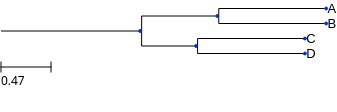

In [10]:
t.render("%%inline")

In [12]:
t.render('')

{'faces': [[306.47058823529414, 31.0, 315.47058823529414, 46.0, 5, 'C'],
  [306.47058823529414, 46.0, 315.47058823529414, 61.0, 6, 'D'],
  [327.64705882352945, 1.0, 336.64705882352945, 16.0, 2, 'A'],
  [327.64705882352945, 16.0, 336.64705882352945, 31.0, 3, 'B']],
 'node_areas': {0: [1.0, 1.0, 336.6470588235294, 61.0],
  1: [141.64705882352942, 1.0, 336.6470588235294, 31.0],
  2: [218.76470588235296, 1.0, 336.64705882352945, 16.0],
  3: [218.76470588235296, 16.0, 336.64705882352945, 31.0],
  4: [141.64705882352942, 31.0, 315.47058823529414, 61.0],
  5: [197.58823529411765, 31.0, 315.47058823529414, 46.0],
  6: [197.58823529411765, 46.0, 315.47058823529414, 61.0]},
 'nodes': [[303.47058823529414, 37.0, 306.47058823529414, 40.0, 5, None],
  [215.76470588235296, 14.5, 218.76470588235296, 17.5, 1, None],
  [303.47058823529414, 52.0, 306.47058823529414, 55.0, 6, None],
  [194.58823529411765, 44.5, 197.58823529411765, 47.5, 4, None],
  [324.64705882352945, 7.0, 327.64705882352945, 10.0, 2, N